# 1. Flight Price Dataset : Questions 1 - 8

## Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [1]:
# Loading flight price dataset
import pandas as pd
df_flight = pd.read_excel("flight_price.xlsx")
df_flight.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [2]:
# Number of rows and columns in dataframe
rows , cols = df_flight.shape
print(f'Number of rows in flight dataset is : {rows}')
print(f'Number of columns in flight dataset is : {cols}')

Number of rows in flight dataset is : 10683
Number of columns in flight dataset is : 11


## Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.

In [3]:
## function to plot QQ plots along with Histograms to check normality
import scipy.stats as stat
import pylab
import seaborn as sns
import matplotlib.pyplot as plt

def qq_plot(df,feature):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    sns.histplot(df[feature],kde=True)
    plt.title(f'Histogram Plot for : {feature}')
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist="norm",plot=pylab)
    plt.title(f'Q-Q Plot for : {feature}')
    plt.show()

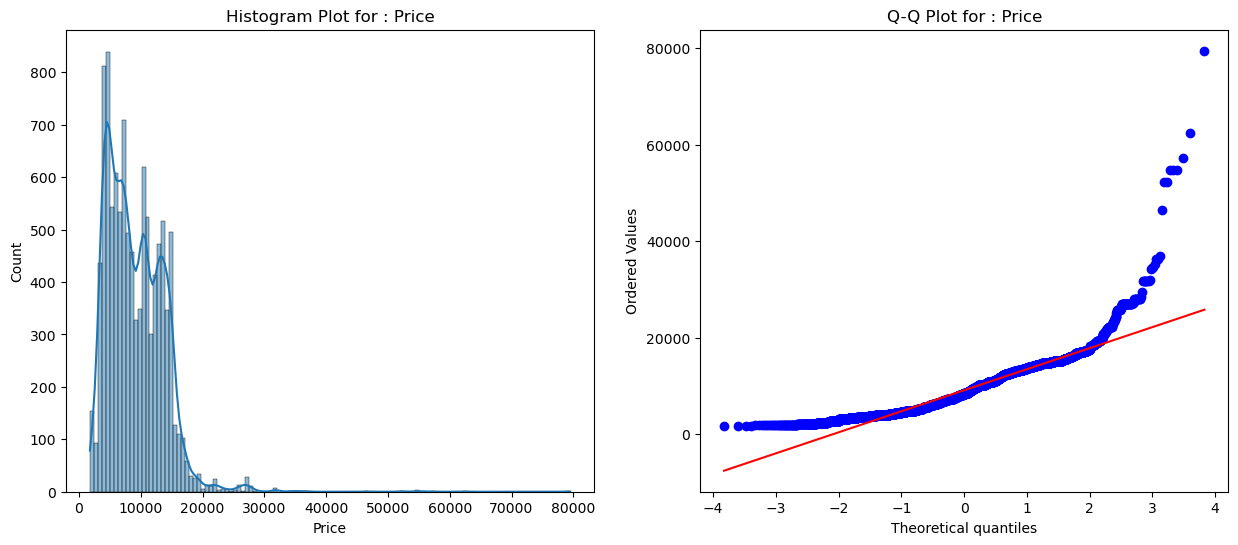

In [4]:
qq_plot(df_flight,"Price")

### Histogram shows that Price is Right (Positively) Skewed.

## Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [5]:
# Calculate max , min and range of price in dataset
max_price = df_flight["Price"].max()
min_price = df_flight["Price"].min()
range_price = max_price - min_price

# Print Max , Min and Range values
print(f'Maximum Price of Flight is : {max_price}')
print(f'Minimum Price of Flight is : {min_price}')
print(f'Range of price is : {range_price}')

Maximum Price of Flight is : 79512
Minimum Price of Flight is : 1759
Range of price is : 77753


In [6]:
df_flight[["Price"]].describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


## Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

In [7]:
df_flight.groupby("Airline").describe()

Price                              \
                                    count          mean           std   
Airline                                                                 
Air Asia                            319.0   5590.260188   2027.362290   
Air India                          1752.0   9611.210616   3900.952942   
GoAir                               194.0   5861.056701   2703.585767   
IndiGo                             2053.0   5673.682903   2264.142168   
Jet Airways                        3849.0  11643.923357   4258.940578   
Jet Airways Business                  6.0  58358.666667  11667.596748   
Multiple carriers                  1196.0  10902.678094   3721.234997   
Multiple carriers Premium economy    13.0  11418.846154   1717.153936   
SpiceJet                            818.0   4338.284841   1849.922514   
Trujet                                1.0   4140.000000           NaN   
Vistara                             479.0   7796.348643   2914.298578   
Vistara Premium economy               3.0   8962.333333   2915.405518   

                                                                        \
                                       min      25%      50%       75%   
Airline                                                                  
Air Asia                            3383.0   4282.0   5162.0   6451.00   
Air India                           2050.0   6896.0   9443.0  12219.00   
GoAir                               3398.0   3898.0   5135.0   6811.25   
IndiGo                              2227.0   4226.0   5000.0   6494.00   
Jet Airways                         1840.0   9134.0  11467.0  14151.00   
Jet Airways Business               46490.0  52243.0  54747.0  61122.50   
Multiple carriers                   5797.0   7723.0  10197.0  13587.00   
Multiple carriers Premium economy   9845.0  10161.0  11269.0  11269.00   
SpiceJet                            1759.0   3574.5   3873.0   4760.00   
Trujet                              4140.0   4140.0   4140.0   4140.00   
Vistara                             3687.0   5403.0   7980.0   9345.00   
Vistara Premium economy             5969.0   7547.0   9125.0  10459.00   

                                            
                                       max  
Airline                                     
Air Asia                           13774.0  
Air India                          31945.0  
GoAir                              22794.0  
IndiGo                             22153.0  
Jet Airways                        54826.0  
Jet Airways Business               79512.0  
Multiple carriers                  36983.0  
Multiple carriers Premium economy  14629.0  
SpiceJet                           23267.0  
Trujet                              4140.0  
Vistara                            21730.0  
Vistara Premium economy            11793.0

Text(0.5, 1.0, 'Price Variation by Airline')

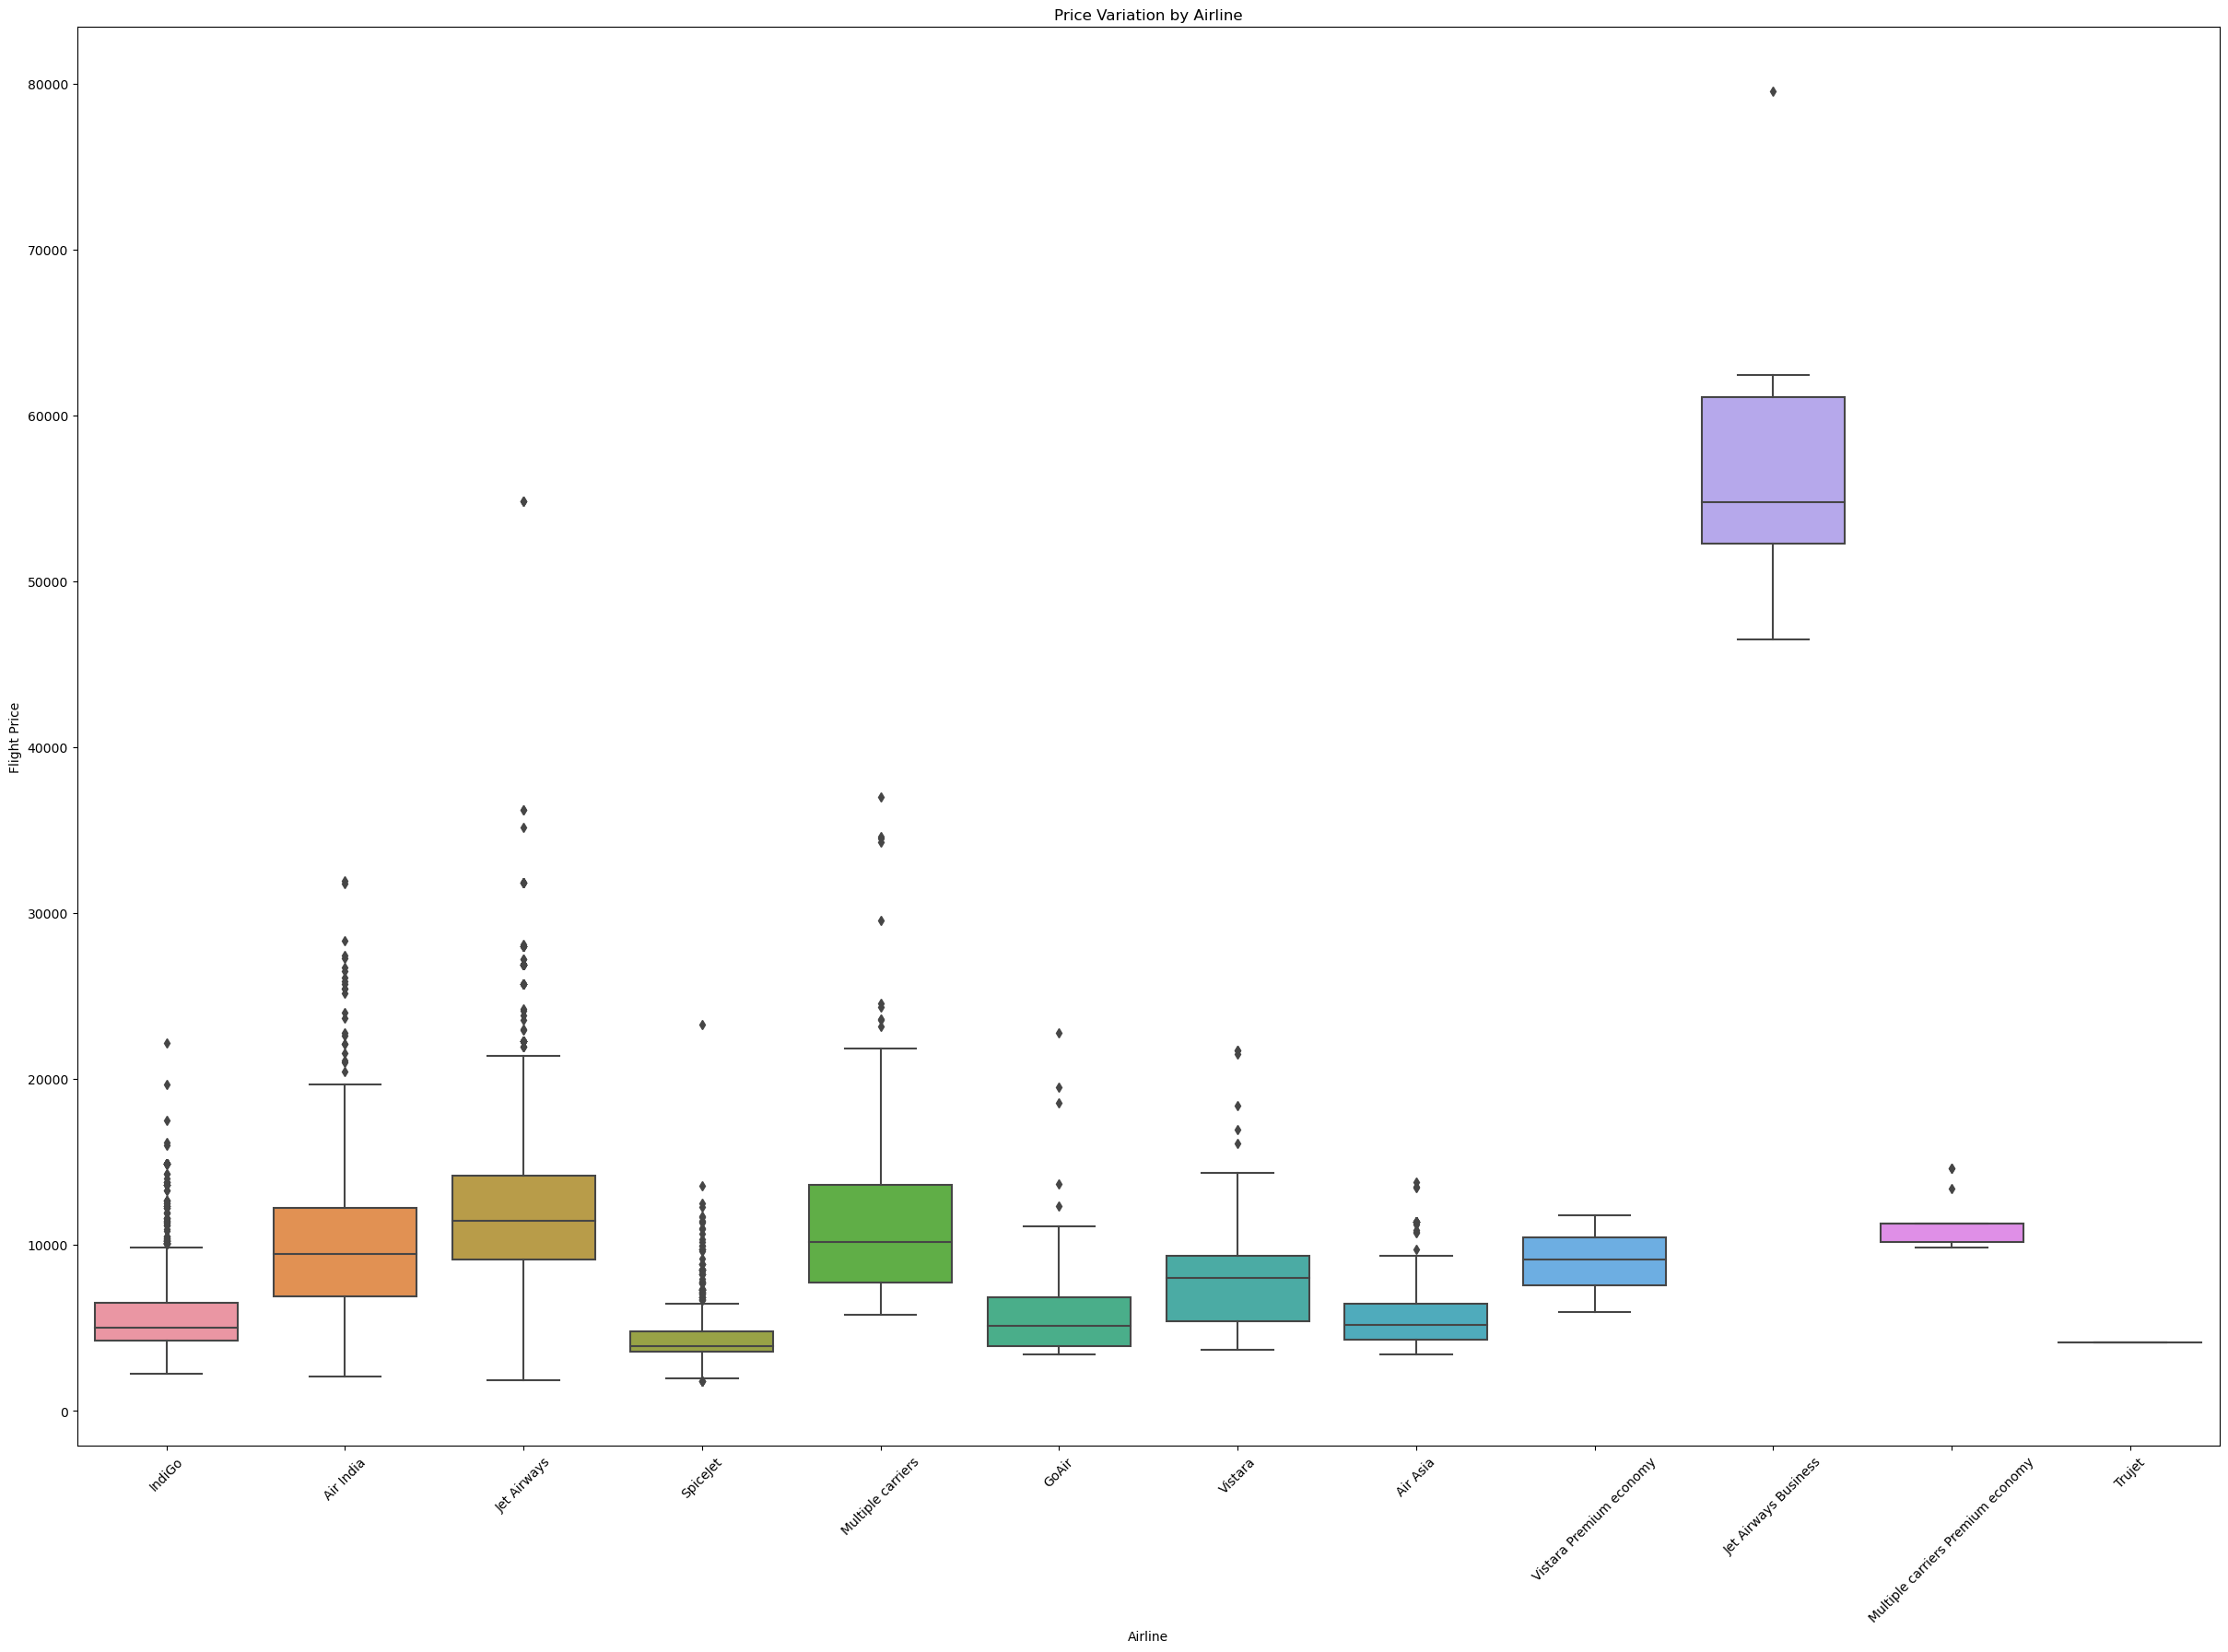

In [8]:
import seaborn as sns 

plt.figure(figsize=(30,20))
sns.boxplot(df_flight , x="Airline" , y="Price")

plt.xlabel('Airline')
plt.ylabel('Flight Price')
plt.xticks(rotation=45)
plt.title('Price Variation by Airline')

## Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.

## ANS:-

**A boxplot is a graphical representation of the distribution of a dataset based on five summary statistics: minimum value, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum value. It also displays any potential outliers in the dataset, which are defined as observations that are more than 1.5 times the interquartile range (IQR) below the first quartile or above the third quartile.**

**Identifying and interpreting potential outliers in a dataset using a boxplot is an important step in data analysis, as outliers can have a significant impact on the results. It is essential to investigate any outliers further and determine if they should be included or excluded from the analysis based on their validity and relevance to the research question.**

<AxesSubplot: xlabel='Price'>

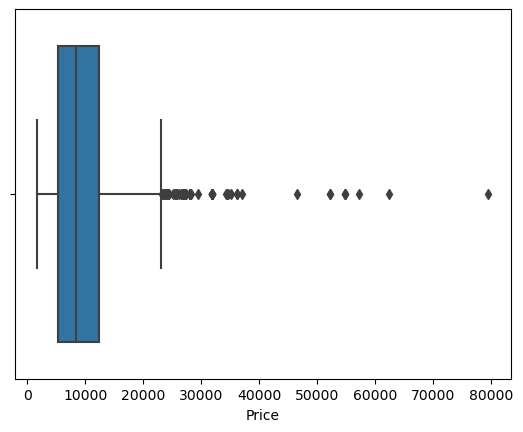

In [9]:
import seaborn as sns
sns.boxplot(df_flight,x="Price")

### Outliers found in the Price of flight

In [10]:
import numpy as np
from scipy.stats import iqr

# Calculate the q1,q3 & IQR
q1 , q3 = np.percentile(df_flight["Price"],[25,75])
iqr_value = iqr(df_flight["Price"])

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", iqr_value)

Q1: 5277.0
Q3: 12373.0
IQR: 7096.0


In [11]:
df_flight[df_flight.Price > q3 + 1.5*iqr_value]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
123,Air India,1/03/2019,Delhi,Cochin,DEL → BOM → COK,23:00,19:15 02 Mar,20h 15m,1 stop,No info,27430
396,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983
486,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
510,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,12:25,5h 25m,1 stop,No info,26890
597,Air India,6/03/2019,Mumbai,Hyderabad,BOM → JDH → DEL → HYD,09:40,15:15 07 Mar,29h 35m,2 stops,No info,25139
...,...,...,...,...,...,...,...,...,...,...,...
10353,Jet Airways,6/03/2019,Mumbai,Hyderabad,BOM → BDQ → DEL → HYD,19:50,16:50 07 Mar,21h,2 stops,No info,24210
10364,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
10383,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,07:00,05:05 02 Mar,22h 5m,1 stop,No info,26890
10439,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,09:00 02 Mar,14h 20m,1 stop,No info,31825


## 94 Outliers found in this dataset.

## Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?

In [12]:
## load the dataset
df = pd.read_excel("flight_price.xlsx")
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [13]:
# convert Date_of_Journey in spefic column wise day month year wise

from warnings import filterwarnings
filterwarnings('ignore')

df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Date'] = df['Date_of_Journey'].dt.day
df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year
df['Day'] = df['Date_of_Journey'].dt.day_name()


'''df['DayOfWeek'] = df['Day'].map({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 
                                 'Saturday':5, 'Sunday':6})'''

"df['DayOfWeek'] = df['Day'].map({'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, \n                                 'Saturday':5, 'Sunday':6})"

In [14]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,Sunday
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,Saturday


In [15]:
## average price of month & day wise

monthly_prices = df.groupby("Month")["Price"].mean().reset_index()
day_prices = df.groupby("Day")["Price"].mean().reset_index()

In [16]:
monthly_prices

,Month,Price
0,1,10492.642791
1,3,8433.839891
2,4,5230.860849
3,5,9361.077628
4,6,9214.964905
5,9,9551.474395
6,12,9110.774295


In [17]:
day_prices

,Day,Price
0,Friday,8556.502220
1,Monday,9721.101945
2,Saturday,8894.375727
3,Sunday,9556.827684
4,Thursday,9805.088646
5,Tuesday,8960.452265
6,Wednesday,7996.290807


In [18]:
# create Season columns for particular Month wise
df['Season']=df['Month'].map({1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Summer',7:'Summer',8:'Summer',9:'Fall',10:'Fall',11:'Fall',12:'Winter'})

# find average of seasonal_prices
seasonal_prices=df.groupby('Season')['Price'].mean().reset_index()
seasonal_prices

,Season,Price
0,Fall,9551.474395
1,Spring,8553.828838
2,Summer,9214.964905
3,Winter,9841.831693


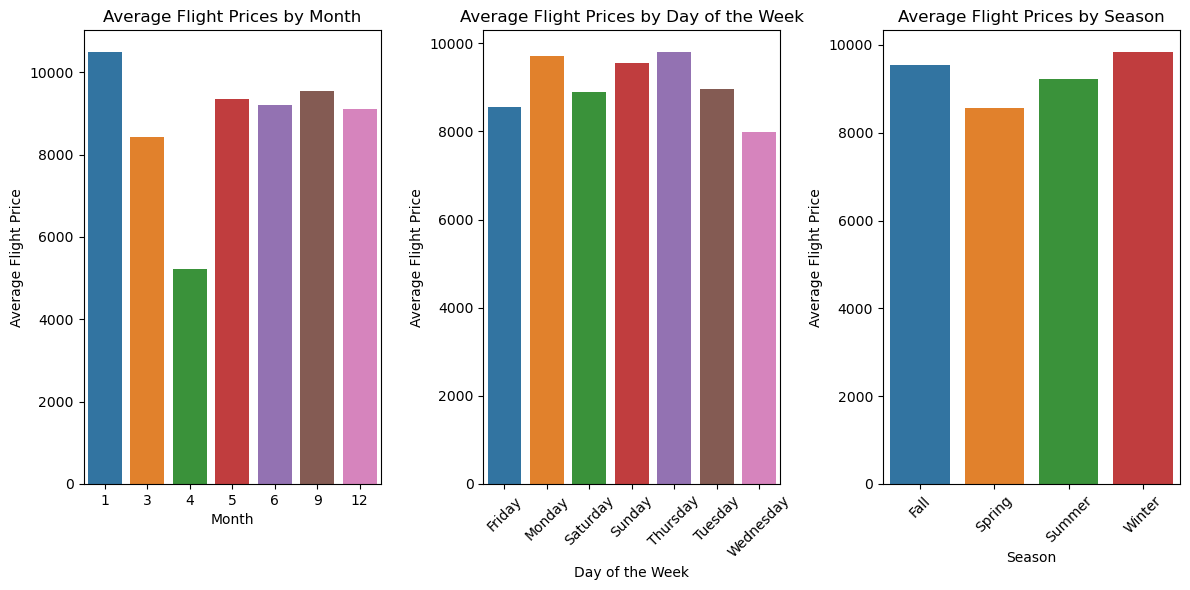

In [19]:
plt.figure(figsize=(12,6))

# plot for Month V/S Average Monthly Flight Price
plt.subplot(1,3,1)
sns.barplot(monthly_prices,x="Month",y="Price")
plt.xlabel('Month')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Month')

# plot for Day V/S Average Daly Flight Price
plt.subplot(1,3,2)
sns.barplot(day_prices,x="Day",y="Price")
plt.xlabel('Day of the Week')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Day of the Week')
plt.xticks(rotation=45)

# plot for Season V/S Average seasonal Flight Price
plt.subplot(1,3,3)
sns.barplot(seasonal_prices,x="Season",y="Price")
plt.xlabel('Season')
plt.ylabel('Average Flight Price')
plt.title('Average Flight Prices by Season')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Insights :

1. Cheapest Price is in **Month** of April with average price of 5230.86
2. Highest Price is in **Month** of Janury with average price of 10492.64

========

3. Cheapest Prices are usually with flights departing on **Wednesday** at average price of 7996.29
4. Highest Prices are usually with flights departing on **Thursday** at average price of 9805.08

=======

5. Cheapest Price is in **Season** of Spring with average price of 8553.82
6. Highest Price is in **Season** of Winter with average price of 9841.83

## Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?

## ANS:-

#### To identify trends in flight prices, I would start by analyzing the following features in the Flight Price dataset:

1. Time-related features: These would include date of booking, date of travel, and time of day of travel. By analyzing these features, we can identify whether flight prices tend to be higher or lower during certain times of the year, or certain times of the day.

2. Route-related features: These would include the origin and destination cities of the flights, as well as any stopovers or layovers. By analyzing these features, we can identify whether flight prices tend to be higher or lower for certain routes, or for flights with specific stopover locations.

3. Airline-related features: These would include the airline carrier for each flight. By analyzing these features, we can identify whether certain airlines tend to have higher or lower prices than others.

4. Demand-related features: These would include the number of passengers booked on a flight, as well as the number of seats available. By analyzing these features, we can identify whether flight prices tend to be higher or lower when demand is high or low.

#### To present my findings to the team, I would use a variety of visualizations. Some examples might include:

1. Line charts: These could be used to show how flight prices change over time, or how they vary based on the time of day or day of the week.

2. Scatterplots: These could be used to show the relationship between flight prices and variables like the number of passengers or the number of seats available.

3. Bar charts: These could be used to compare flight prices across different airlines or different routes.

4. Heatmaps: These could be used to show which times of year tend to have higher or lower flight prices for different routes.

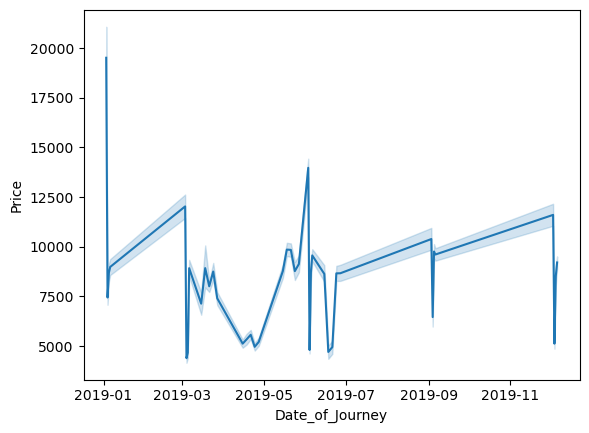

In [20]:
sns.lineplot(data=df, x="Date_of_Journey", y="Price")
plt.show()

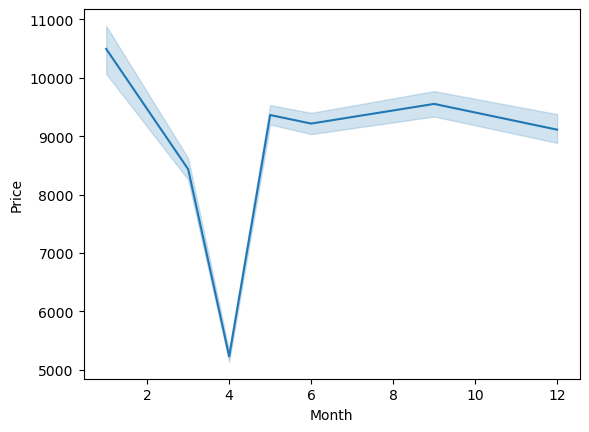

In [21]:
sns.lineplot(data=df, x="Month", y="Price")
plt.show()

## Insights :
- In the month of April price is chepest

In [22]:
df.groupby("Airline")["Price"].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9611.210616
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

<AxesSubplot: xlabel='Airline'>

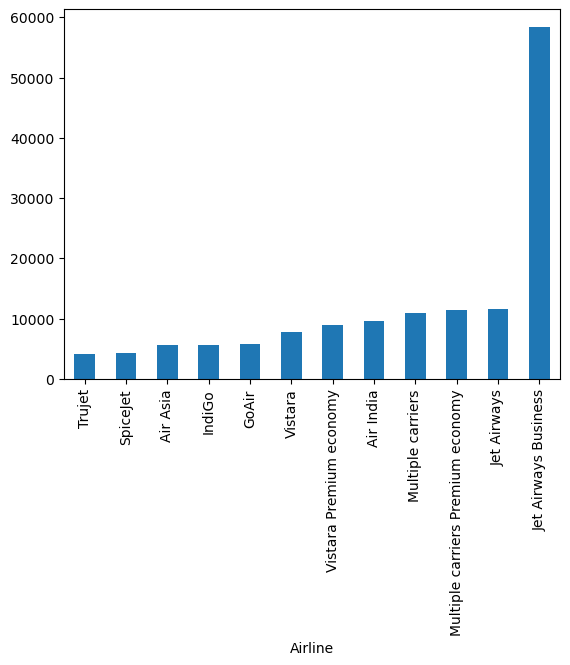

In [23]:
df.groupby("Airline")["Price"].mean().sort_values().plot(kind="bar")

## Insights : 
- Truejet Flights are cheapest

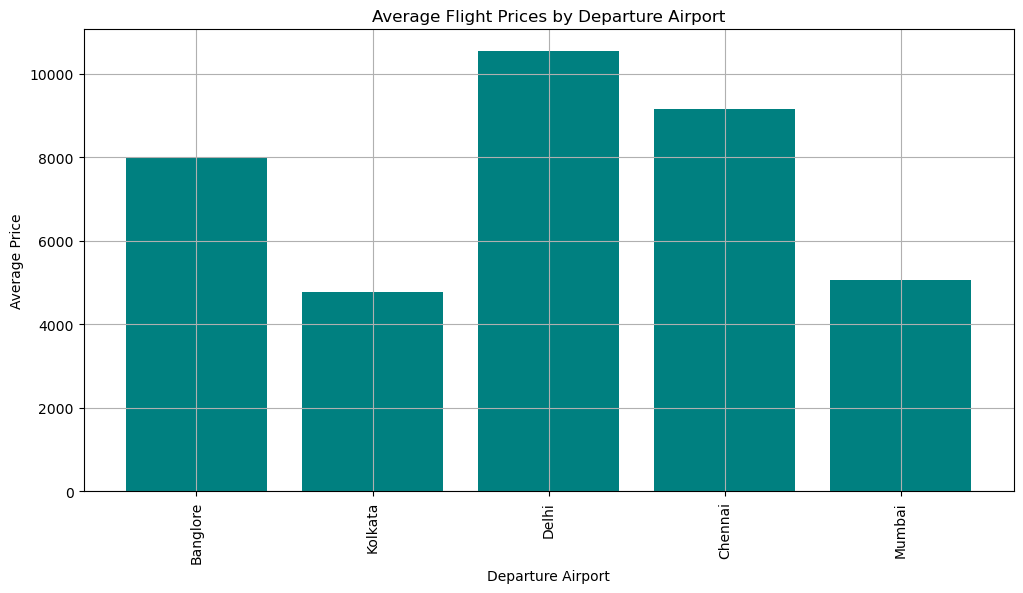

In [24]:
# Analyze trends based on departure and arrival airports
departure_airports = df['Source'].unique()
avg_prices_by_airport = df.groupby('Source')['Price'].mean()

# Create a bar chart for average prices by departure airport
plt.figure(figsize=(12, 6))
plt.bar(departure_airports, avg_prices_by_airport, color='teal')
plt.xlabel('Departure Airport')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Departure Airport')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Insights :
- Departure Airport Delhi is highest price

## Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

## ANS:-

#### To identify the factors that affect flight prices, I would start by analyzing the following features in the Flight Price dataset:

1. Time-related features: These would include date of booking, date of travel, and time of day of travel. By analyzing these features, we can identify whether flight prices tend to be higher or lower during certain times of the year, or certain times of the day.

2. Route-related features: These would include the origin and destination cities of the flights, as well as any stopovers or layovers. By analyzing these features, we can identify whether flight prices tend to be higher or lower for certain routes, or for flights with specific stopover locations.

3. Airline-related features: These would include the airline carrier for each flight. By analyzing these features, we can identify whether certain airlines tend to have higher or lower prices than others.

4. Demand-related features: These would include the number of passengers booked on a flight, as well as the number of seats available. By analyzing these features, we can identify whether flight prices tend to be higher or lower when demand is high or low.

5. Other factors: There may be other features in the dataset that could affect flight prices, such as the type of aircraft used, the length of the flight, or the class of service.

#### To present my findings to the management team, I would create a report that includes the following:

1. Summary statistics: I would provide summary statistics for each feature, including measures of central tendency, variance, and any outliers. This would give the management team a general sense of the distribution of each feature.

2. Visualizations: I would create a variety of visualizations to help illustrate the relationships between different features and flight prices. For example, I might create scatterplots to show the relationship between flight prices and the number of passengers or the number of seats available. I might also create bar charts to compare flight prices across different airlines or different routes.

3. Regression analysis: I would perform regression analysis to identify the factors that have the greatest impact on flight prices. This would allow me to create a predictive model that could be used to estimate flight prices based on different combinations of features.

4. Conclusions and recommendations: Based on my analysis, I would draw conclusions about the factors that have the greatest impact on flight prices and make recommendations to the management team about how they could adjust their pricing strategies to better meet the needs of their customers.

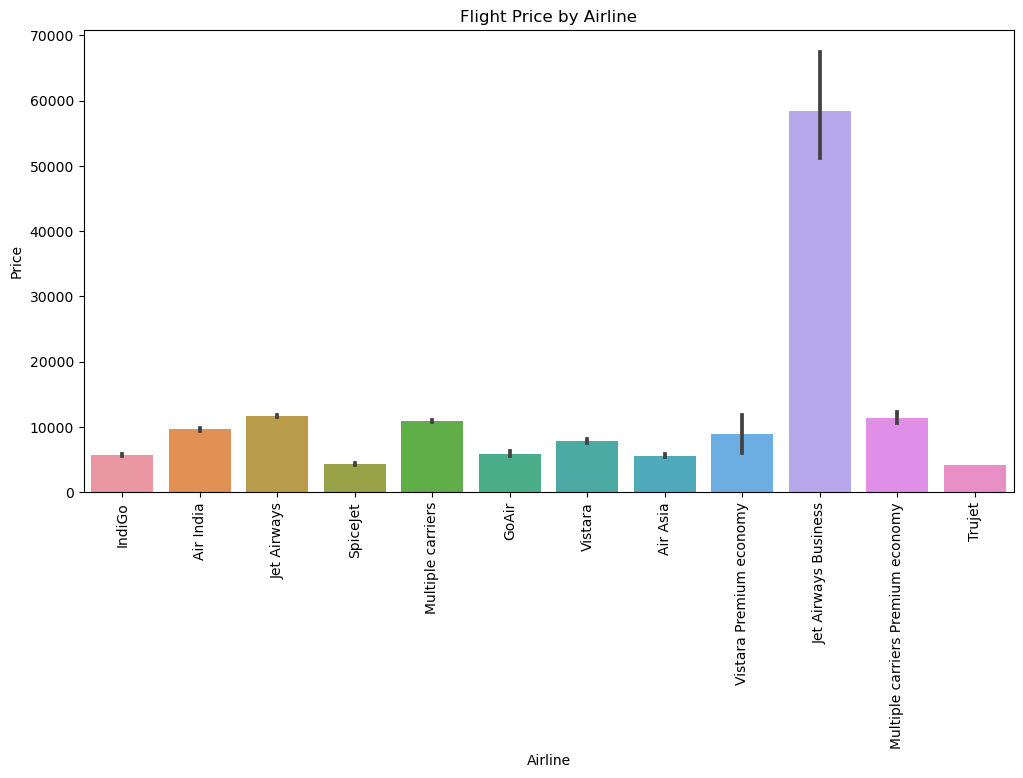

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(x="Airline",y="Price",data=df)
plt.title('Flight Price by Airline')
plt.xticks(rotation=90)
plt.show()

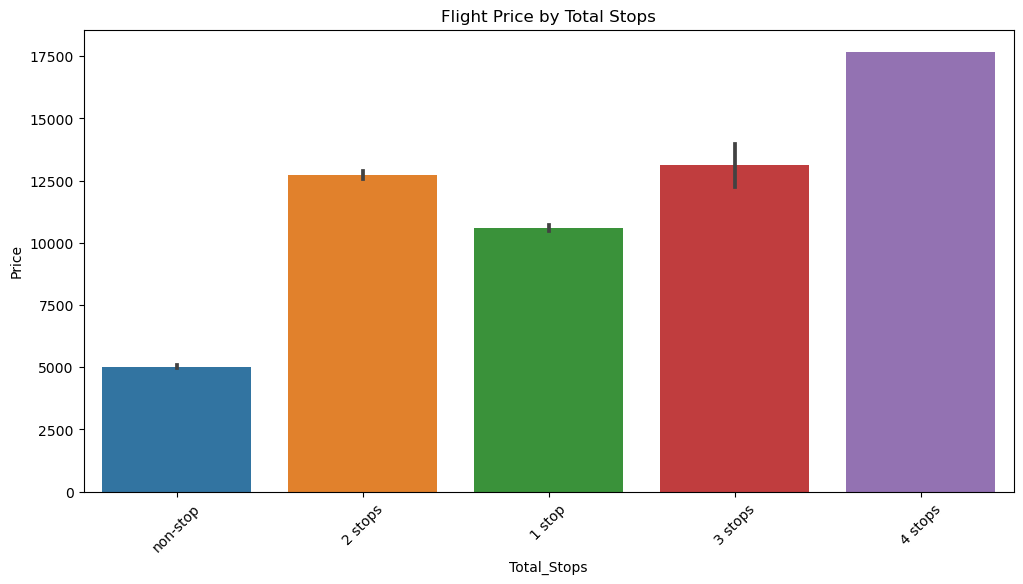

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x="Total_Stops",y="Price",data=df)
plt.title('Flight Price by Total Stops')
plt.xticks(rotation=45)
plt.show()

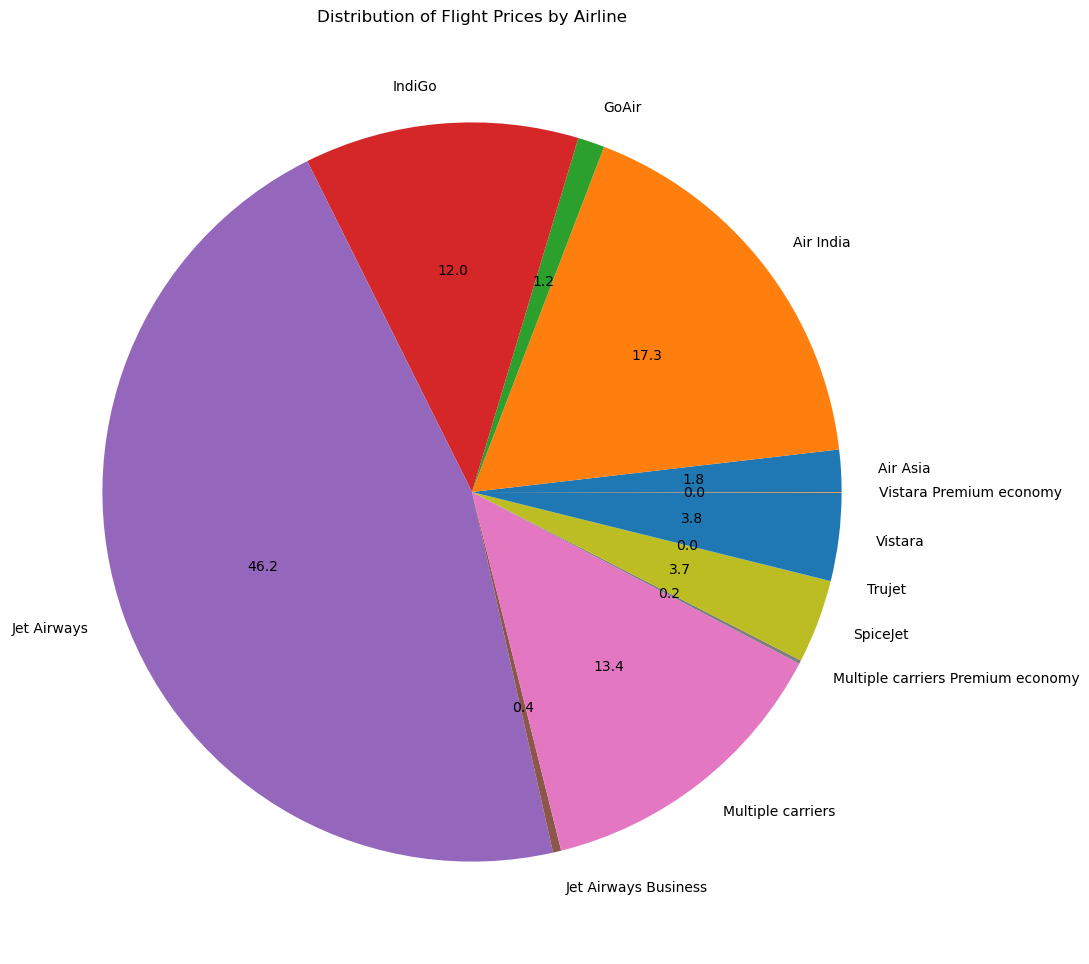

In [27]:
airline_price = df.groupby("Airline")["Price"].sum().reset_index()
plt.figure(figsize=(12,12))
plt.pie(airline_price["Price"],labels=airline_price["Airline"],autopct="%1.1f")
plt.title('Distribution of Flight Prices by Airline')
plt.show()

In [28]:
airline_price

,Airline,Price
0,Air Asia,1783293
1,Air India,16838841
2,GoAir,1137045
3,IndiGo,11648071
4,Jet Airways,44817461
5,Jet Airways Business,350152
6,Multiple carriers,13039603
7,Multiple carriers Premium economy,148445
8,SpiceJet,3548717
9,Trujet,4140


In [29]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Day,Season
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,Sunday,Spring
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,Saturday,Winter
